# Latest Trade Days Ago

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        8211      267763      0.0000      2.6000      9.6000    126.0861     67.0000   4244.3000    371.8891 


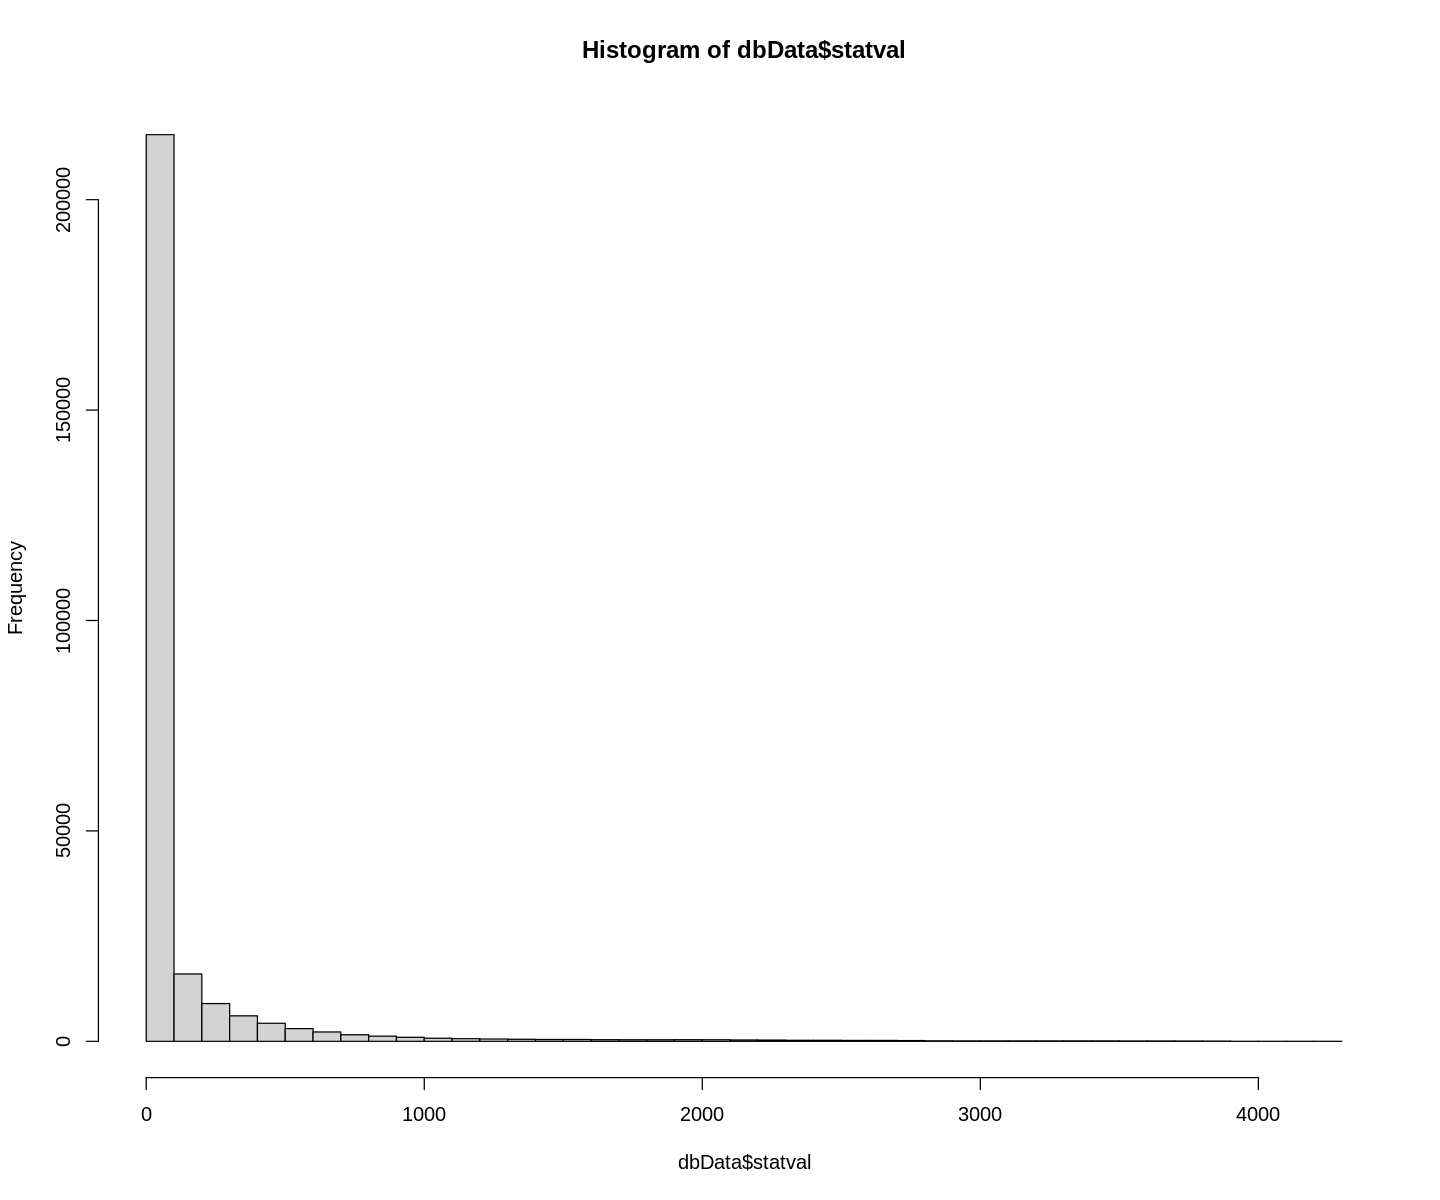

In [2]:
# What data we have.
sql = "select systemid, YYYYMMDD, statval
            from historical_stats_modern h
            where statname='latesttradedaysago' and statval is not null"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        8186      220216      0.0000      2.5000      4.7000     18.6584     23.6000    119.3000     26.5326 


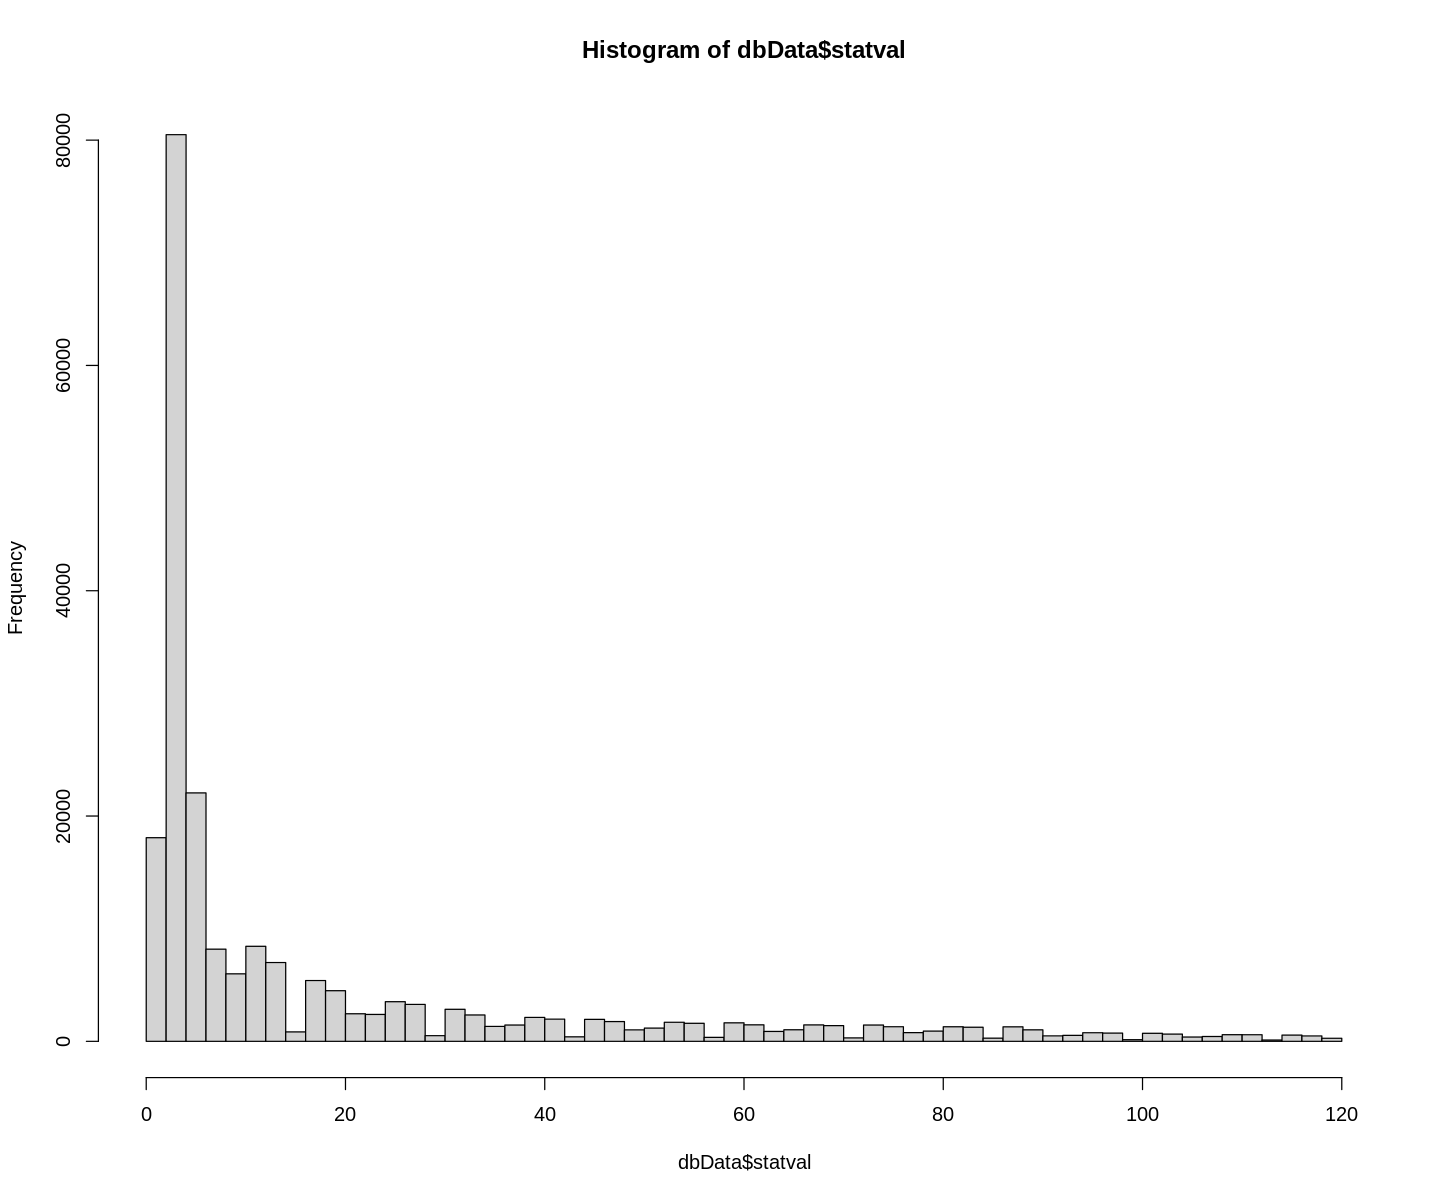

In [3]:
# Let's use 0 - 120 for investigation. Higher numbers are inactive systems.

sql = "select systemid, YYYYMMDD, statval
            from historical_stats_modern h
            where statname='latesttradedaysago' and statval <= 120"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

In [4]:
cat("Collective2 data has 7 days granularity\n")
cat("Let's get some example and look at data\n")
sql = "select YYYYMMDD, statval
            from historical_stats_modern h
            where statname='latesttradedaysago' and statval <= 120
            and systemid = 123937705"

dbData = getC2ScoreDbData(sql)
head(dbData)

Collective2 data has 7 days granularity
Let's get some example and look at data


,YYYYMMDD,statval
,<dbl>,<dbl>
1,20190610,3.4
2,20190617,10.4
3,20190624,2.3
4,20190701,2.3
5,20190708,2.3
6,20190715,2.3


     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2239       82435      0.0000      2.5000      3.6000     12.0410     10.6000    119.1000     20.3977 


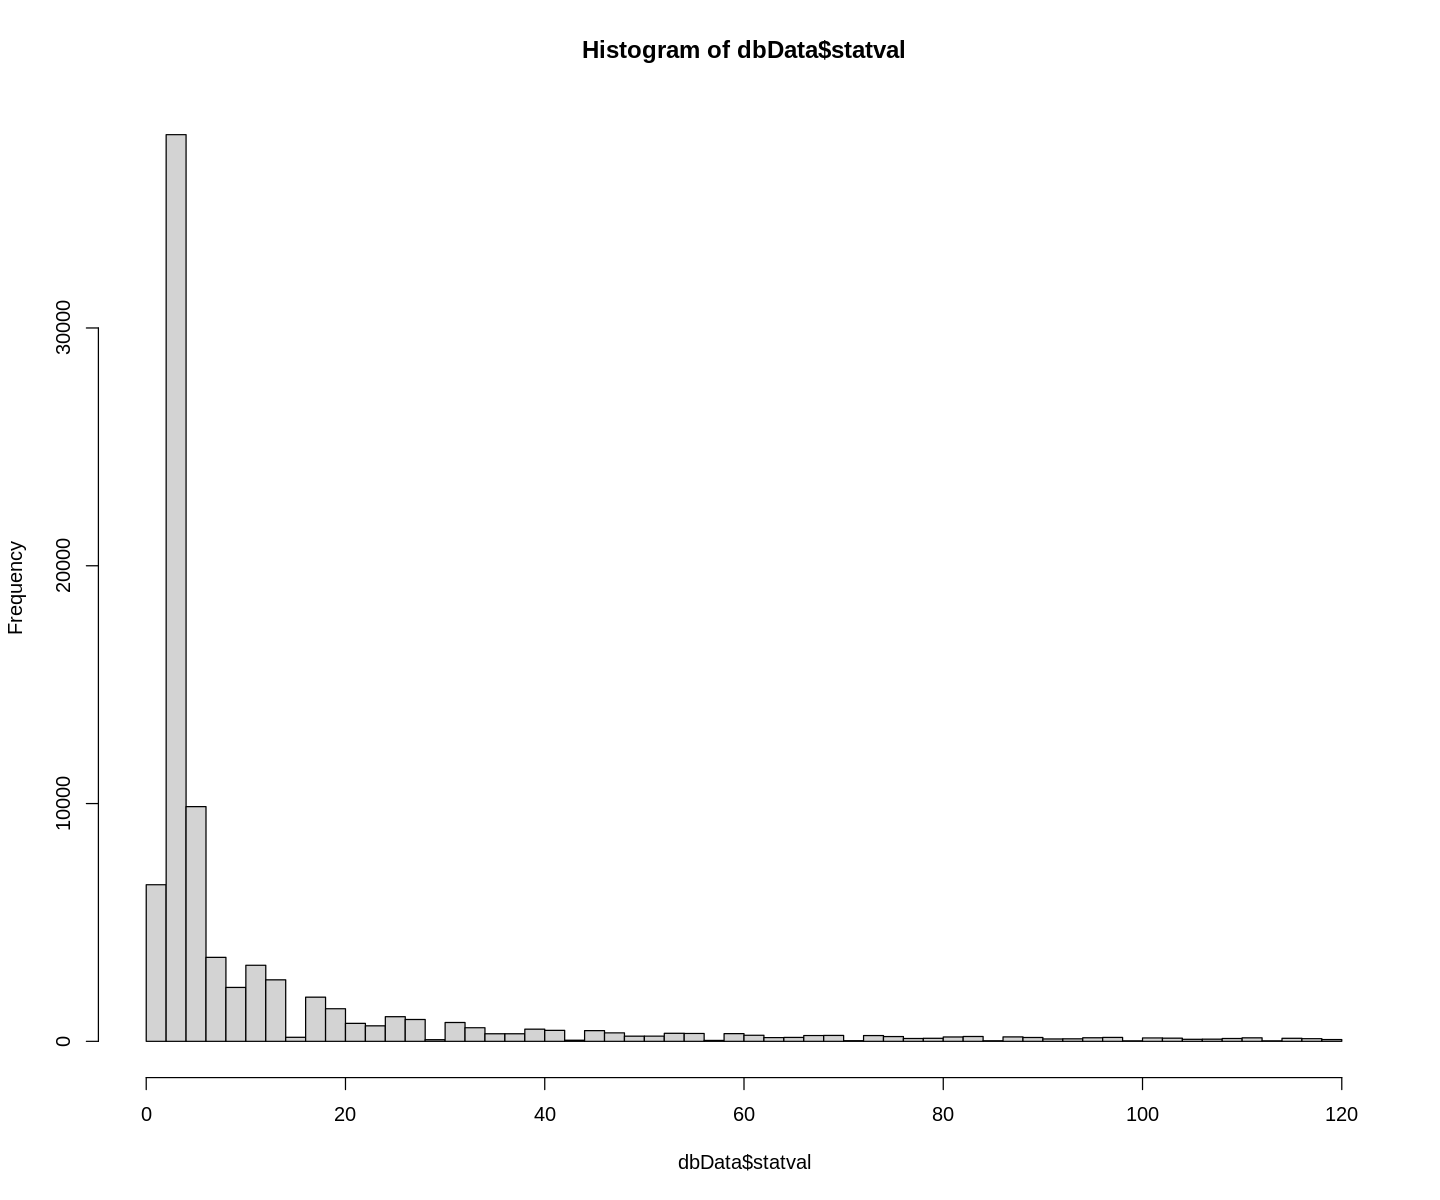

In [5]:
# Join with our cleaned data
sql = "select statval, eq.*
       from ReturnsDataInIntervalsCleanedSkip090 eq
       join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
       where statname='latesttradedaysago' and statval <= 120"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2239       82435      0.0000      2.5000      3.6000     12.0410     10.6000    119.1000     20.3977 



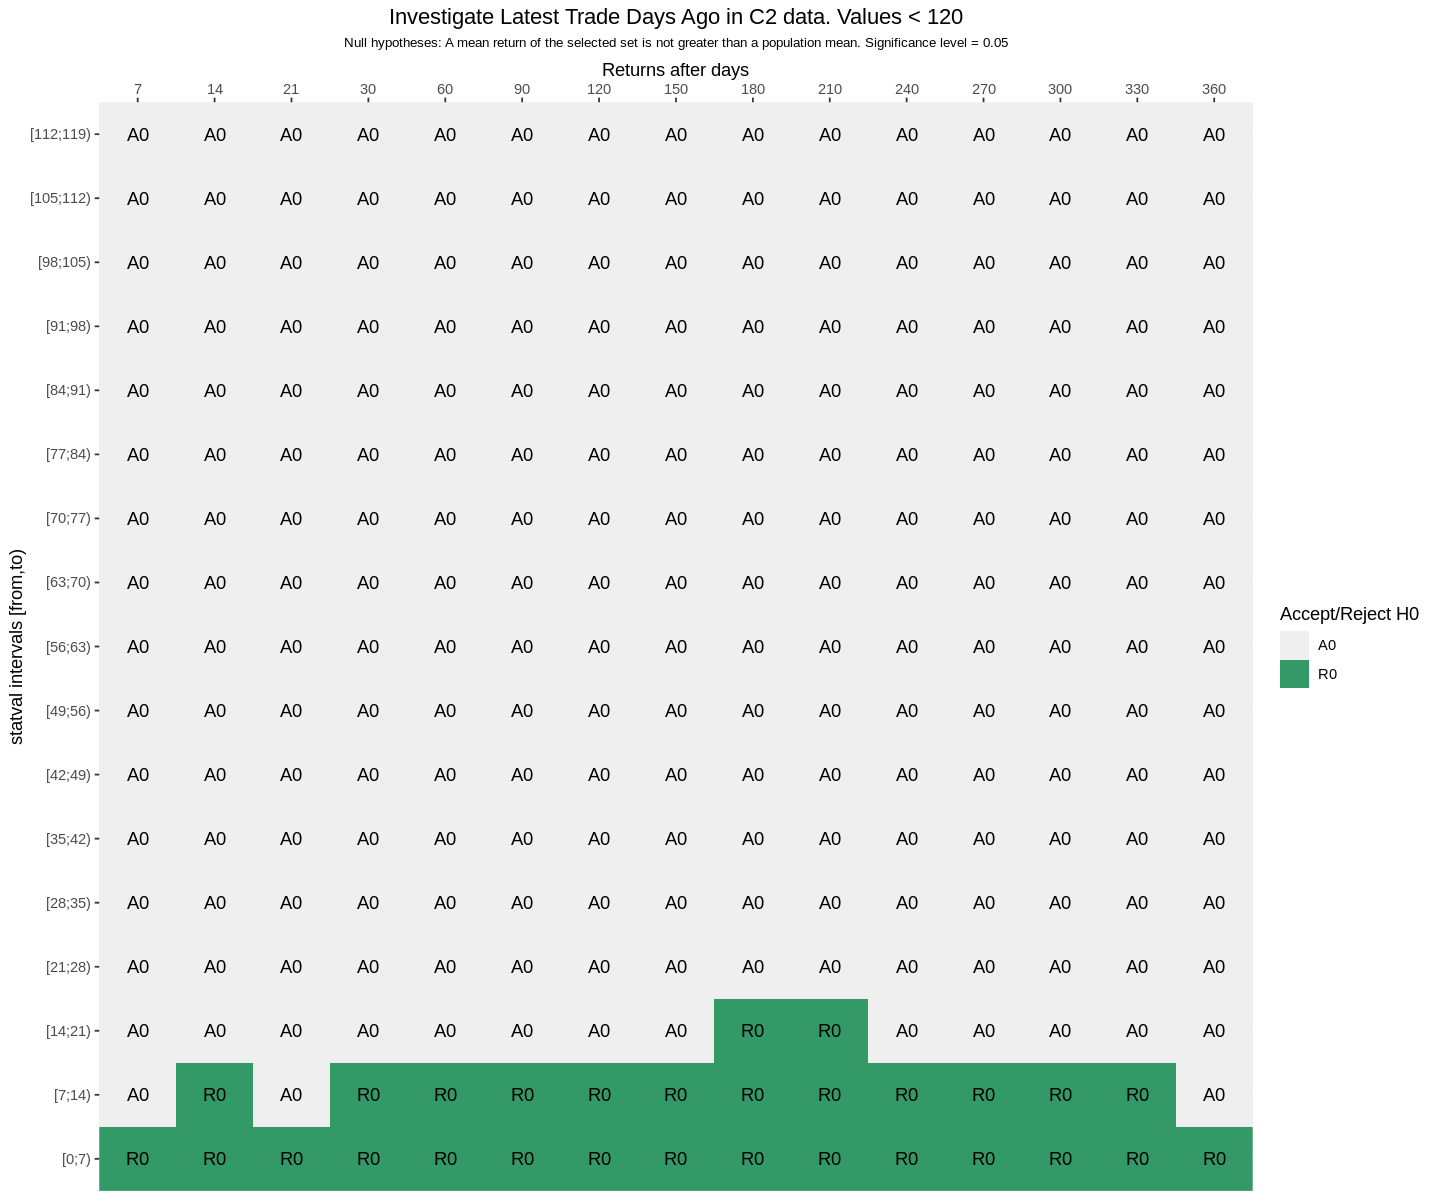

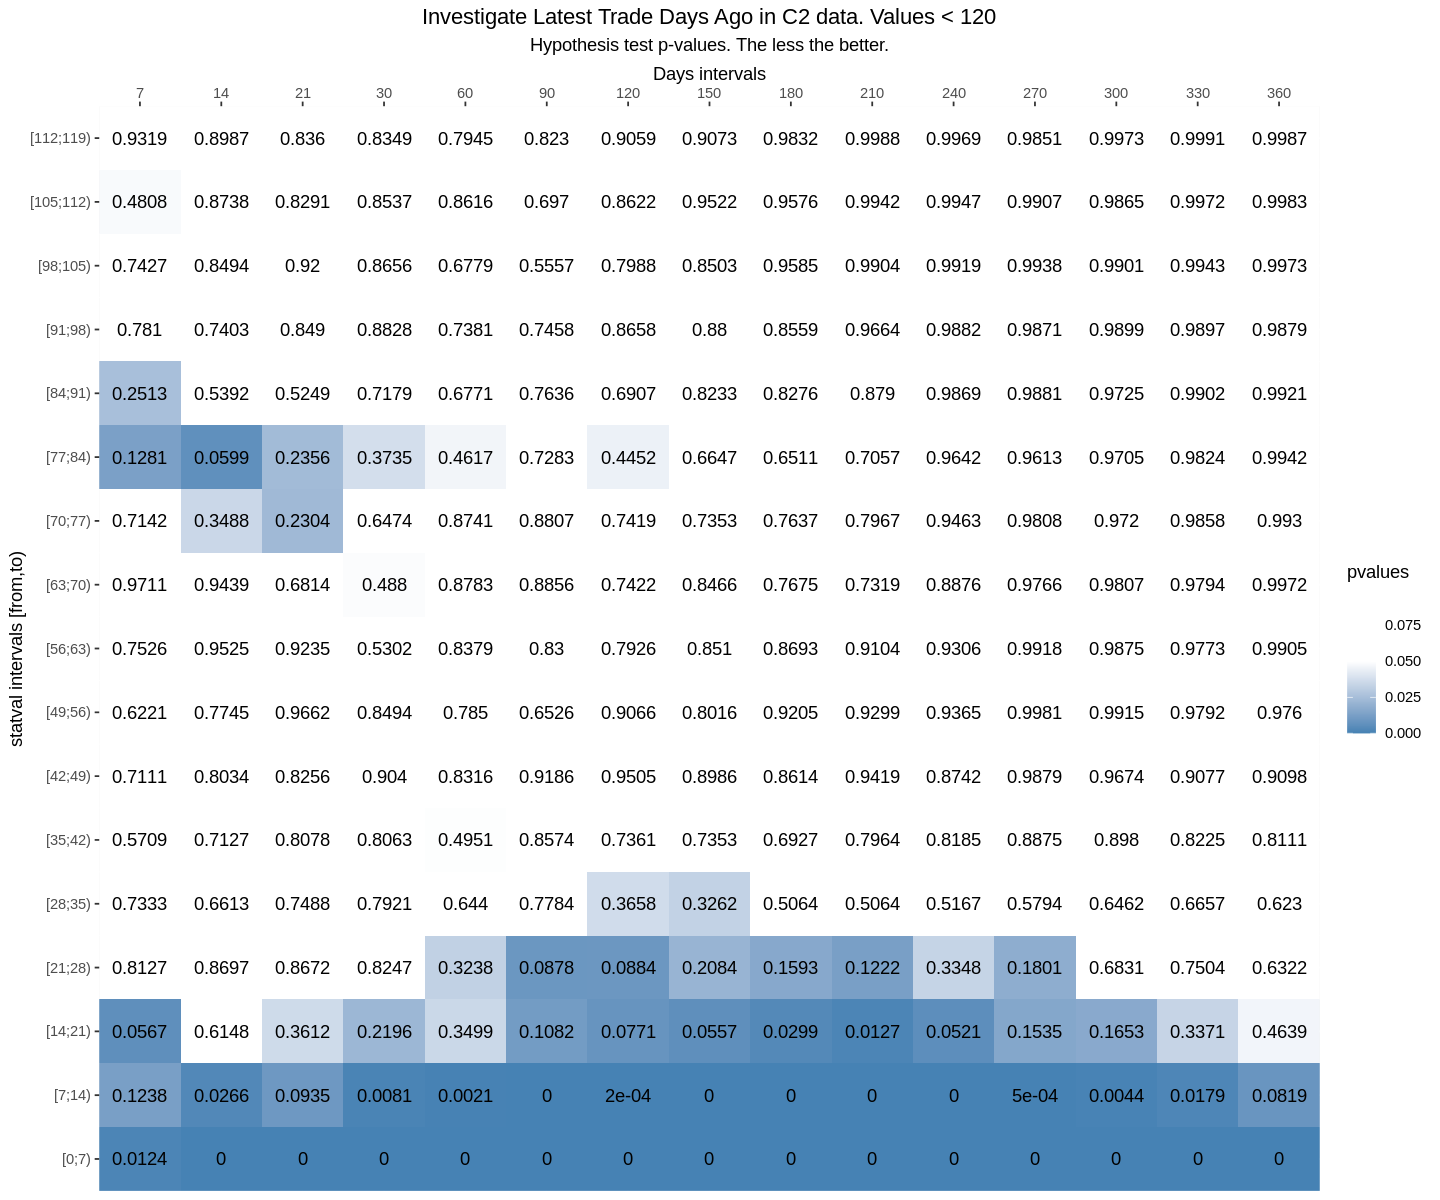

In [6]:
experiment = list(
  name = "Latest Trade Days Ago (C2 data - 7 days granularity)",
  description = "Investigate Latest Trade Days Ago in C2 data. Values < 120",
  sqlText = sql, # the latest sql above
  attributeName = "statval",
  attributeSteps = seq(from = 0, to = 120, by = 7))

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


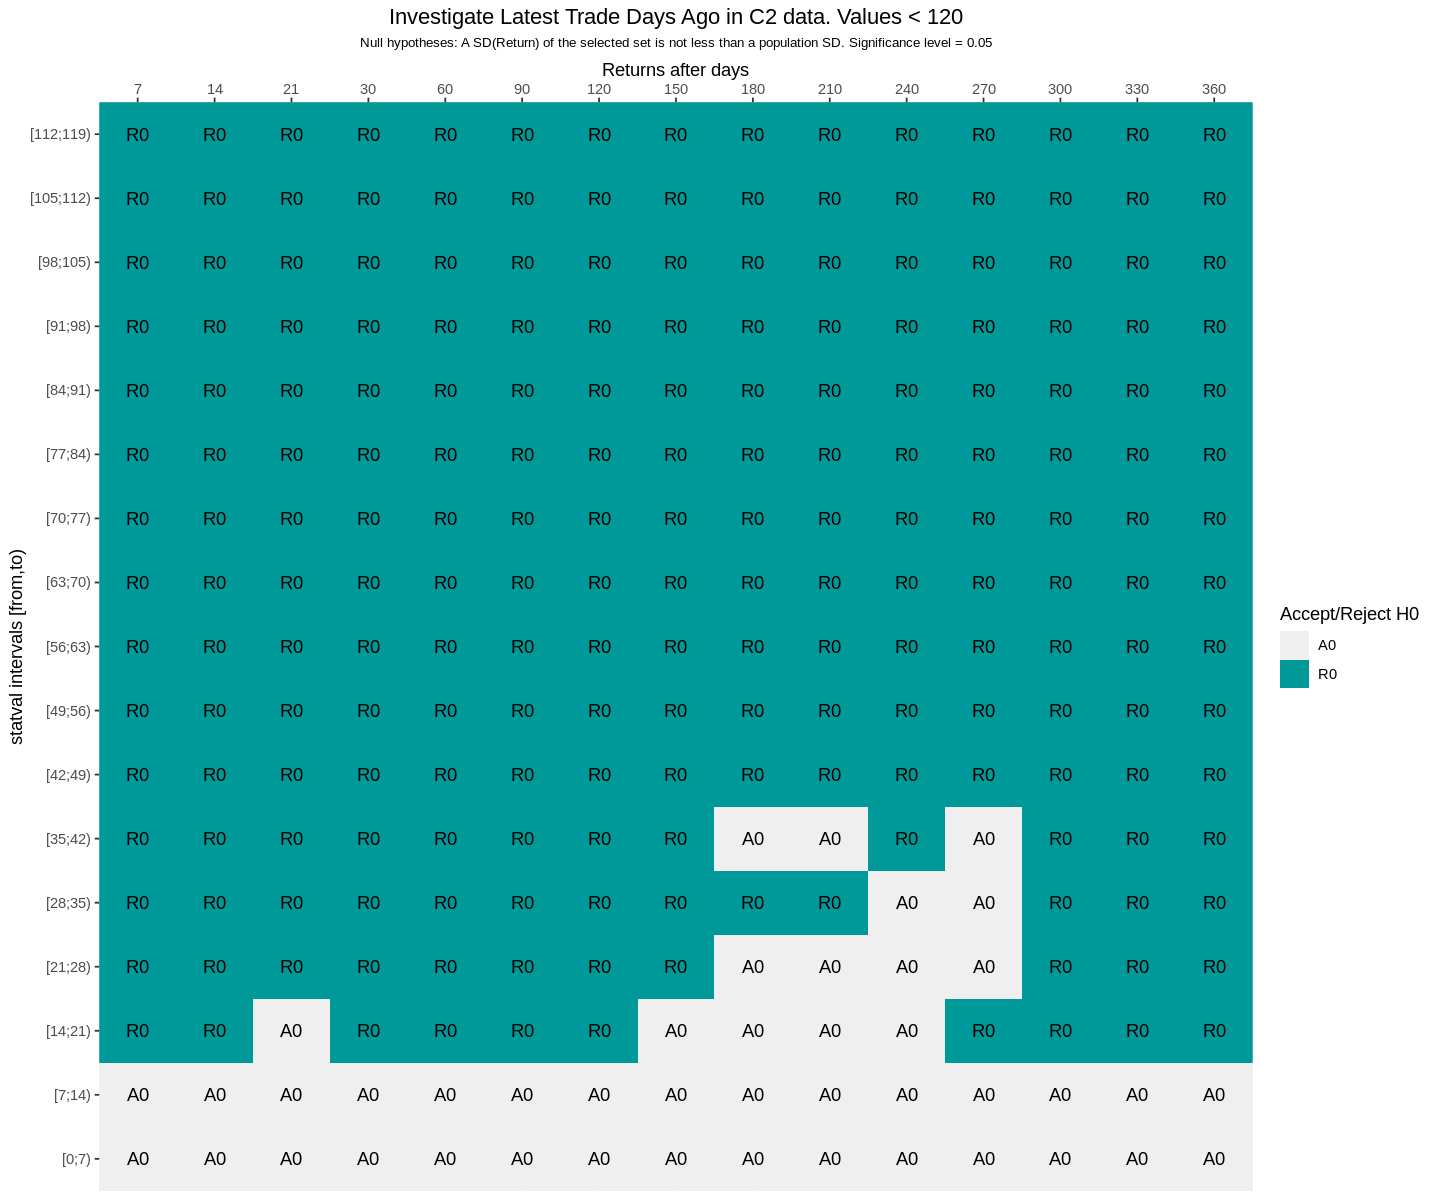

In [7]:
showSDLessHypothesisTest(experiment, result)

In [8]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
112 <= statval < 119,325,316,306,299,271,240,213,190,171,150,133,121,109,100,91
105 <= statval < 112,347,336,326,315,286,253,226,202,180,161,141,128,114,107,95
98 <= statval < 105,374,361,350,338,298,269,239,213,189,172,151,134,121,112,101
91 <= statval < 98,413,404,391,377,337,296,269,233,207,192,167,145,127,116,105
84 <= statval < 91,454,441,432,410,363,322,283,249,224,203,175,150,135,120,111
77 <= statval < 84,509,488,475,452,398,352,304,272,242,215,193,165,148,127,120
70 <= statval < 77,565,549,521,504,437,382,331,292,262,228,210,181,160,141,130
63 <= statval < 70,637,608,588,548,483,423,365,327,288,252,232,203,179,156,142
56 <= statval < 63,743,717,684,647,562,494,425,373,330,297,265,230,202,177,157



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



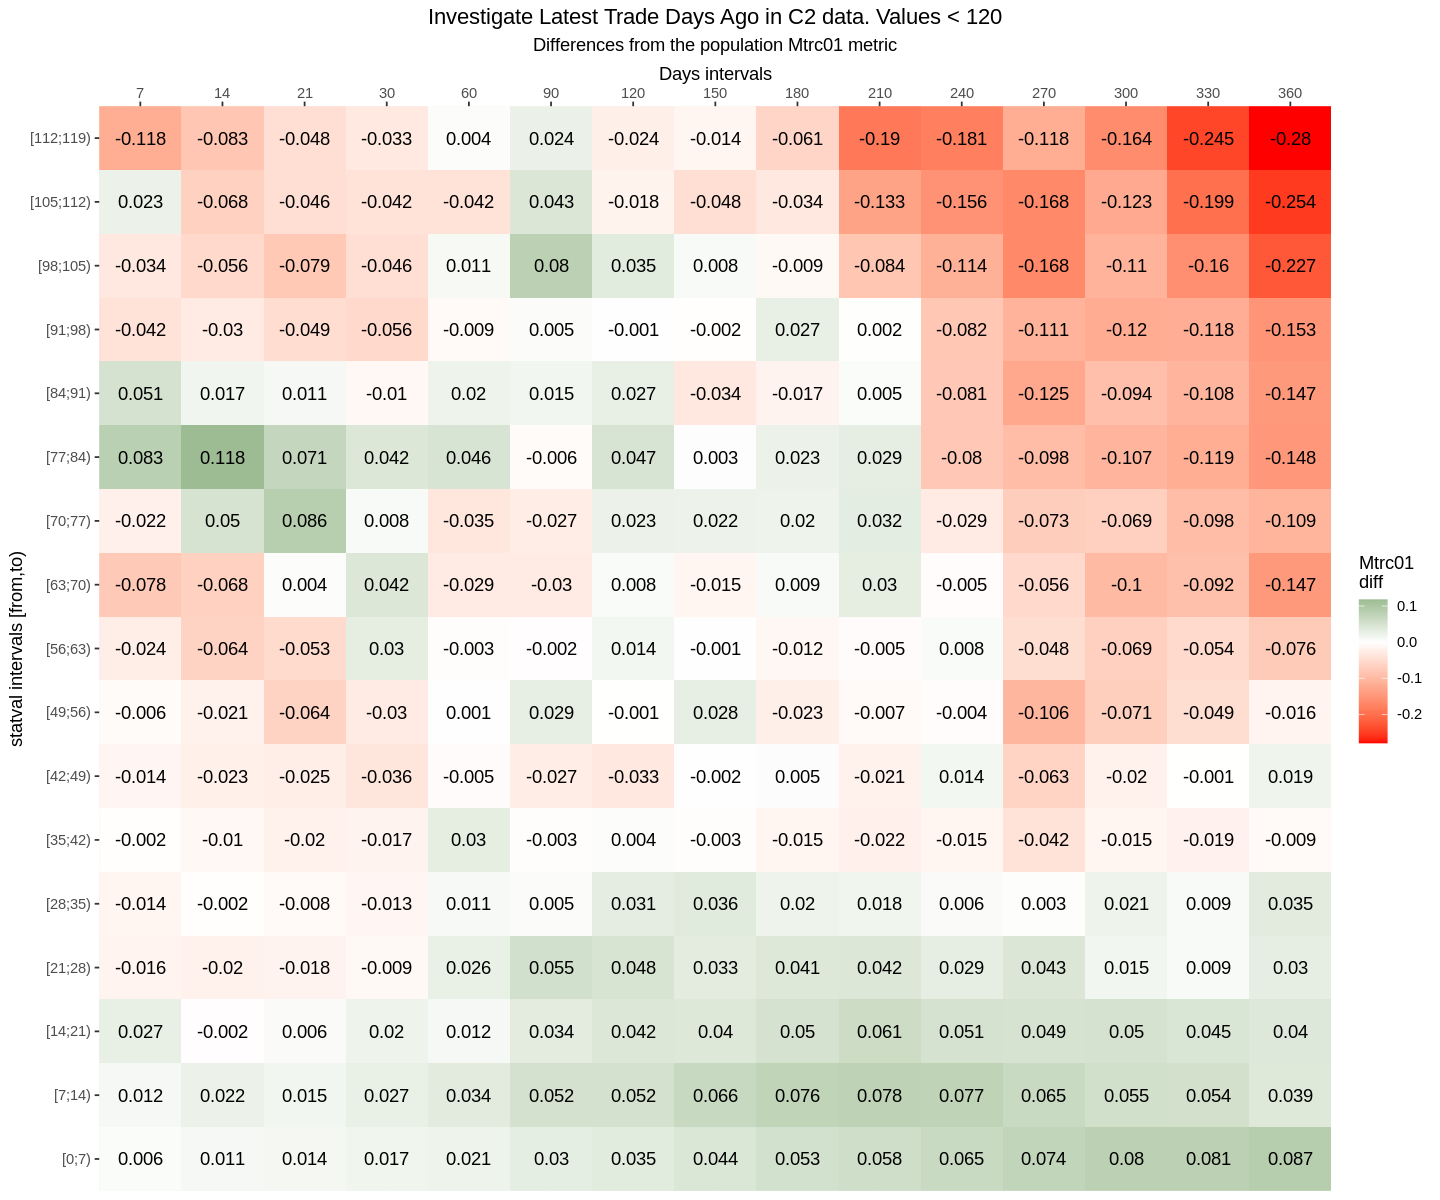

In [9]:
showMetricDifferences(experiment, result)

In [10]:
showSystemsCounts(experiment, result) 



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
112 <= statval < 119,289,280,271,265,238,211,184,164,147,132,115,105,97,90,82
105 <= statval < 112,304,295,285,275,248,219,193,174,154,140,121,109,99,94,85
98 <= statval < 105,329,318,309,297,259,233,205,184,161,149,130,114,103,98,89
91 <= statval < 98,357,350,339,327,290,255,230,201,177,166,145,124,108,100,92
84 <= statval < 91,383,371,364,345,305,268,238,210,188,170,149,125,113,102,95
77 <= statval < 84,423,406,394,375,328,287,251,221,198,176,161,137,122,106,101
70 <= statval < 77,463,449,426,410,355,308,266,234,212,183,170,149,131,114,107
63 <= statval < 70,510,484,466,433,383,332,285,255,226,197,182,162,142,124,113
56 <= statval < 63,570,551,521,490,426,374,317,278,247,223,198,175,151,135,119


### Discussion

.....................